Make sure to run 'make install' from the docs folder in your kernel environment to install the necessary libraries for running this notebook (refer to the README for more details).

##PART A: dual_autodiff tutorial

In [9]:
#Import the packages installed in your environment
import dual_autodiff as df
import numpy as np

Initialising some instances of the Dual class:

In [10]:
x=df.Dual(1,0)
y=df.Dual(3.1,100)
z=df.Dual(0,8.5)

Visualising these dual numbers

In [3]:
print("The dual numbers initialised using dual_autodiff are: ", x, y, z)

The dual numbers initialised using dual_autodiff are:  Dual(real=1, dual=0). Dual(real=3.1, dual=100). Dual(real=0, dual=8.5).


Testing the initialisation using unsupported types

In [3]:
u=df.Dual("real",9)

Performing some basic operators and applying some functions on these dual numbers

In [5]:
print("x==9:", x==9)
print("x+3:", x+3)
print("y-z=",y-z)
print("z*2:",z*2)
print("x**2:",x**2)
print("cos(x):",x.cos())
print("log(y):",y.log())
z_inv = y.inverse()
print("Inverse(y):", z_inv)

x==4: False
x+3: Dual(real=4, dual=0).
y-z= Dual(real=3.1, dual=91.5).
z*2: Dual(real=0, dual=17.0).
x**2: Dual(real=1, dual=0).
cos(x): Dual(real=0.5403023058681398, dual=-0.0).
log(y): Dual(real=1.1314021114911006, dual=32.25806451612903).
Inverse(y): Dual(real=0.3225806451612903, dual=-10.405827263267428).


Performing invalid operations

In [6]:
print("x/0:",x/0)

x/0: nan


Automatic differentiation example:

Function to differentiate: 
f1(x)=sin(cos(x))+log(x) 
Derivative of f1'(x)= -sin(x)cos(cos(x))+1/x

In [12]:
def f1(x):
    return (x.cos()).sin()+x.log()
    
def df1(x):
    return -np.sin(x)*np.cos(np.cos(x))+1/x

x2=df.Dual(4.5,1)
#Refer to the report for the logic behind automatic differentiation using dual numbers
print("Automatic differentiation of f(x) evaluated at 4.5 using dual numbers is ",f1(x2).dual)
print("Analytical derivative of f(x) evaluated at 4.5 ",df1(4.5))


Automatic differentiation of f(x) evaluated at 4.5 using dual numbers is  1.178114429966743
Analytical derivative of f(x) evaluated at 4.5  1.178114429966743


We get similar results! Automatic differentiation using dual numbers has been correctly implemented and can easily be used to find derivatives of functions without having to compute the analytic derivatives.

##PART B: Comparison between cynthonized package (dual_autodiff_x) and the pure python package (dual_autodiff)

In [14]:
#Import the packages installed in your environment
import dual_autodiff_x as dfx

import matplotlib.pyplot as plt
import timeit

1-Basic operations:

Initialising some instances using dual_autodiff_x:

In [15]:
x1=dfx.Dual(1,0)
y1=dfx.Dual(3.1,100)
z1=dfx.Dual(0,8.5)
a=dfx.Dual(30,0)
b=dfx.Dual(8.99,0)

Visualising these new dual numbers:

In [17]:
print("The dual numbers initialised using dual_autodiff_x are: ", x1, y1, z1)

The dual numbers initialised using dual_autodiff_x are:  Dual(real=1, dual=0). Dual(real=3.1, dual=100). Dual(real=0, dual=8.5).


Performing some operations on the dual numbers of the cynthonized package and the dual numbers of the pure python package and comparing their results

In [18]:
print("Result of adding x and y using dual_autodiff:", x+y)
print("Result of adding x1 and y1 using dual_autodiff_x:", x1+y1)
print("\n")
print("Result of adding x and 5 using dual_autodiff:", 5+x)
print("Result of adding x1 and 5 using dual_autodiff_x:", 5+x1)
print("\n")
print("Result of subtracting x from y using dual_autodiff:", x-y)
print("Result of subtracting x1 from y1 using dual_autodiff_x:", x1-y1)
print("\n")
print("Result of subtracting 7 from y:", y-7)
print("Result of subtracting 7 from y1:", y1-7)
print("\n")
print("Result of multiplying x and y:", x*y)
print("Result of multiplying x1 and y1:", x1*y1)
print("\n")
print("Result of multiplying 5 and y:", 5*y)
print("Result of multiplying 5 and y1:", 5*y)
print("\n")
print("Result of dividing  x by y:", x/y)
print("Result of dividing  x1 by y1:", x/y)

print("\n")
print("Result of raising x to the power of y:", x/y)
print("Result of raising x1 to the power of y1:", x/y)

Result of adding x and y using dual_autodiff: Dual(real=4.1, dual=100).
Result of adding x1 and y1 using dual_autodiff_x: Dual(real=4.1, dual=100).


Result of adding x and 5 using dual_autodiff: Dual(real=6, dual=0).
Result of adding x1 and 5 using dual_autodiff_x: Dual(real=6, dual=0).


Result of subtracting x from y using dual_autodiff: Dual(real=-2.1, dual=-100).
Result of subtracting x1 from y1 using dual_autodiff_x: Dual(real=-2.1, dual=-100).


Result of subtracting 7 from y: Dual(real=-3.9, dual=100).
Result of subtracting 7 from y1: Dual(real=-3.9, dual=100).


Result of multiplying x and y: Dual(real=3.1, dual=100.0).
Result of multiplying x1 and y1: Dual(real=3.1, dual=100.0).


Result of multiplying 5 and y: Dual(real=15.5, dual=500).
Result of multiplying 5 and y1: Dual(real=15.5, dual=500).


Result of dividing  x by y: Dual(real=0.3225806451612903, dual=-10.405827263267428).
Result of dividing  x1 by y1: Dual(real=0.3225806451612903, dual=-10.405827263267428).


Result 

Exploring how the cynthonized package handles invalid cases

In [19]:
print("Result of dividing x1 by 0:", x1/0)

Result of dividing  x by 0: nan


Comparaisons 

In [20]:
print("x==4:", x==4)
print("x1==4:", x1==4)
print("\n")
print("x!=4:", x!=4)
print("x1!=4:", x1!=4)
print("\n")
print("x==x1:", x==x1)
print("\n")
print("x1!=x:", x!=x1)
print("\n")
print("z==30", z1==30)
print("z1==30", z1==30)

x==4: False
x1==4: False


x!=4: True
x1!=4: True


x==x1: True


x1!=x: False


z==30 False
z1==30 False


Applying functions on the dual numbers of the cynthonized package and the dual numbers of the pure python package and comparing their results

In [21]:
print("Result of cos(x):", x.cos())
print("Result of cos(x1):", x1.cos())
print("\n")
print("Result of sin(y):", y.sin())
print("Result of sin(y1):", y1.sin())
print("\n")
print("Result of log(y):", y.log())
print("Result of log(y1):", y1.log())

Result of cos(x): Dual(real=0.5403023058681398, dual=-0.0).
Result of cos(x1): Dual(real=0.5403023058681398, dual=-0.0).


Result of sin(y): Dual(real=0.04158066243329049, dual=-99.91351502732795).
Result of sin(y1): Dual(real=0.04158066243329049, dual=-99.91351502732795).


Result of log(y): Dual(real=1.1314021114911006, dual=32.25806451612903).
Result of log(y1): Dual(real=1.1314021114911006, dual=32.25806451612903).


##Comparing the performance of dual_autodiff and dual_autodiff_x and storing the results in a dictionnary.

A- Timing Basic operators:

In [23]:
print("Timing addition")
print("dual_autodiff:")
%timeit x+ y
print("dual_autodiff_x:")
%timeit x1+y1
print("\n")
print("Timing subtraction")
print("dual_autodiff:")
%timeit x- y
print("dual_autodiff_x:")
%timeit x1-y1
print("\n")
print("Timing multiplication of two dual numbers")
print("dual_autodiff:")
%timeit x*y
print("dual_autodiff_x:")
%timeit x1*y1
print("\n")
print("Timing multiplication of dual number and scalar")
print("dual_autodiff:")
%timeit 5*x
print("dual_autodiff_x:")
%timeit 5*x1
print("\n")
print("Timing division")
print("dual_autodiff:")
%timeit x/y
print("dual_autodiff_x:")
%timeit x1/y1
print("\n")
print("Timing power")
print("dual_autodiff:")
%timeit x**2
print("dual_autodiff_x:")
%timeit x1**2


Timing addition
484 ns ± 4.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
234 ns ± 4.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing subtraction
494 ns ± 4.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
240 ns ± 2.69 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing multiplication of two dual numbers
599 ns ± 3.23 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
292 ns ± 2.09 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing multiplication of dual number and scalar
551 ns ± 2.03 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
238 ns ± 1.16 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing division
831 ns ± 9.75 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
369 ns ± 4.81 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing power
812 ns ± 9.05 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 lo

B- Timing functions:

In [24]:
print("Timing cos() using dual_autodiff")
%timeit x.cos()
print("Timing cos() using dual_autodiff_x")
%timeit x1.cos()
print("\n")

print("Timing sin() using dual_autodiff")
%timeit x.sin()
print("Timing sin() using dual_autodiff_x")
%timeit x1.sin()
print("\n")

print("Timing log() using dual_autodiff")
%timeit y.log()
print("Timing log() using dual_autodiff_x")
%timeit y1.log()
print("\n")

print("Timing exp() using dual_autodiff")
%timeit x.exp()
print("Timing exp() using dual_autodiff_x")
%timeit x1.exp()

Timing cos() using dual_autodiff
2.34 µs ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Timing cos() using dual_autodiff_x
1.95 µs ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing sin() using dual_autodiff
2.37 µs ± 20.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Timing sin() using dual_autodiff_x
2 µs ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Timing log() using dual_autodiff
1.3 µs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Timing log() using dual_autodiff_x
974 ns ± 9.69 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Timing exp() using dual_autodiff
2.45 µs ± 34.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Timing exp() using dual_autodiff_x
2.04 µs ± 21.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Creating more complex functions and loops:

In [25]:
print("Timing loops using x from dual_autodiff")
%timeit [y*x for i in range(10000)]

print("Timing loops using x1 from dual_autodiff_x")
%timeit [y1*x1 for i in range(10000)]

Timing loops using x from dual_autodiff
6.32 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing loops using x1 from dual_autodiff_x
3.24 ms ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
def f(x,y):
    list=[]
    for i in range(1000):
        list.append((x.cos()).sin()+(y.exp()).log())

    return x

In [27]:
print("Timing the f function using x, y from dual_autodiff as parameters ")
%timeit f(x,y)

print("Timing the f function using x1, y1 from dual_autodiff_x as parameters ")
%timeit f(x1,y1)

Timing the f function using x, y from dual_autodiff as parameters 
8.43 ms ± 73.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing the f function using x1, y1 from dual_autodiff_x as parameters 
6.53 ms ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Plotting the differences of the performance of these functions and operators of the two packages for different number of iterations.

In [28]:
iterations=[100,500,1000,5000,10000]
timing_results = {
    'Addition':  {'dual': [], 'dual_x': []},
    'Subtraction':{'dual': [], 'dual_x': []},
    'Multiplication': {'dual': [], 'dual_x': []},
    'Division': {'dual': [], 'dual_x': []},
    'Power': {'dual': [], 'dual_x': []},
}
timing_results1={
    'Cos': {'dual': [], 'dual_x': []},
    'Sin': {'dual': [], 'dual_x': []},
    'Log':{'dual': [], 'dual_x': []}, 
    'Loops':{'dual': [], 'dual_x': []},
    'f function': {'dual': [], 'dual_x': []},
}

In [29]:
for iter in iterations:
    dual = timeit.timeit('x + y', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1 + y1', globals=globals(), number=iter)
    timing_results['Addition']['dual'].append((iter, dual))
    timing_results['Addition']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('x-y', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1-y1', globals=globals(), number=iter)
    timing_results['Subtraction']['dual'].append((iter, dual))
    timing_results['Subtraction']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('x*y', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1*y1', globals=globals(), number=iter)
    timing_results['Multiplication']['dual'].append((iter, dual))
    timing_results['Multiplication']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('x / y', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1 / y1', globals=globals(), number=iter)
    timing_results['Division']['dual'].append((iter, dual))
    timing_results['Division']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('x**5', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1**5', globals=globals(), number=iter)
    timing_results['Power']['dual'].append((iter, dual))
    timing_results['Power']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('x.log()', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1.log()', globals=globals(), number=iter)
    timing_results1['Log']['dual'].append((iter, dual))
    timing_results1['Log']['dual_x'].append((iter, dual_x))


    dual = timeit.timeit('x.cos()', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1.cos()', globals=globals(), number=iter)
    timing_results1['Cos']['dual'].append((iter, dual))
    timing_results1['Cos']['dual_x'].append((iter, dual_x))


    dual = timeit.timeit('x.sin()', globals=globals(), number=iter)
    dual_x= timeit.timeit('x1.sin()', globals=globals(), number=iter)
    timing_results1['Sin']['dual'].append((iter, dual))
    timing_results1['Sin']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('[y*x for i in range(10000)]', globals=globals(), number=iter)
    dual_x= timeit.timeit('[y1*x1 for i in range(10000)]', globals=globals(), number=iter)
    timing_results1['Loops']['dual'].append((iter, dual))
    timing_results1['Loops']['dual_x'].append((iter, dual_x))

    dual = timeit.timeit('f(x, y)', globals=globals(), number=iter)
    dual_x= timeit.timeit('f(x1, y1)', globals=globals(), number=iter)
    timing_results1['f function']['dual'].append((iter, dual))
    timing_results1['f function']['dual_x'].append((iter, dual_x))



Plotting the differences of performance of the operators of the two packages:

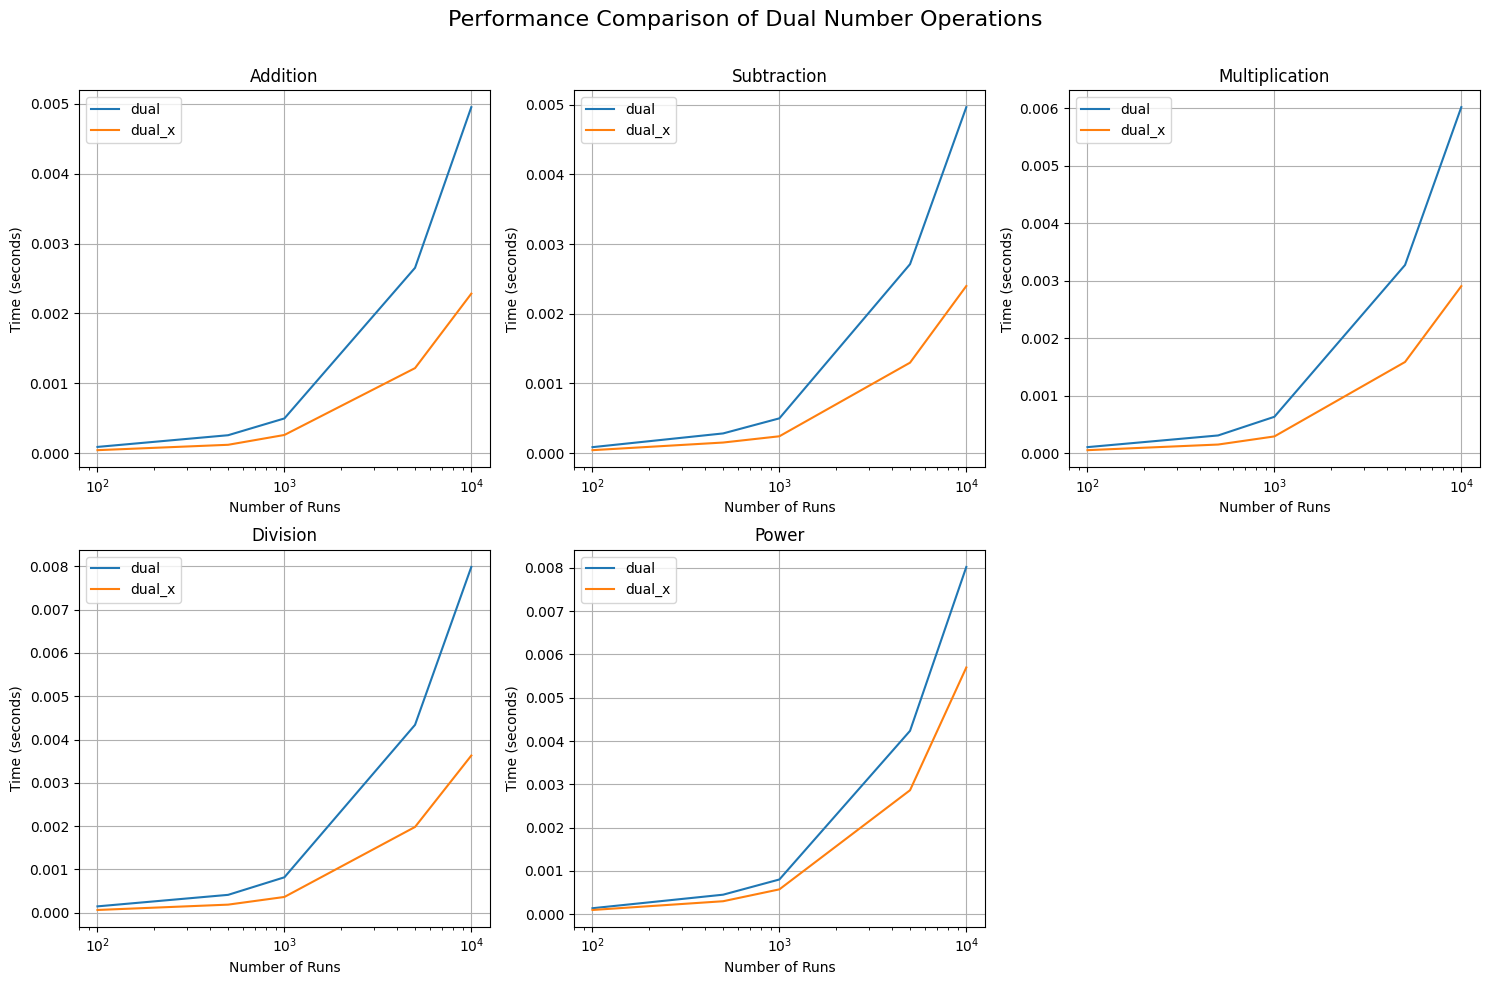

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
operations = list(timing_results.keys())
titles = ['Addition', 'Subtraction', 'Multiplication', 'Division', 'Power']
fig.suptitle('Performance Comparison of Dual Number Operations between Dual_autodiff_x and Dual_autodiff', fontsize=16)
axes = axes.flatten()


#Plot each operation
for i, operation in enumerate(operations):
    ax = axes[i]
    dual_data = timing_results[operation]['dual']
    dual_x_data = timing_results[operation]['dual_x']
    iterations_dual, times_dual = zip(*dual_data)
    iterations_dual_x, times_dual_x = zip(*dual_x_data)
    ax.plot(iterations_dual, times_dual, label='dual')
    ax.plot(iterations_dual_x, times_dual_x,label='dual_x')
    
    ax.set_xscale('log')
    ax.set_xlabel('Number of Runs')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(titles[i])
    ax.legend()
    ax.grid(True)

#Removing the last non used grid
fig.delaxes(axes[-1])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Plotting the results of the differences of performance of the operators of the two packages:

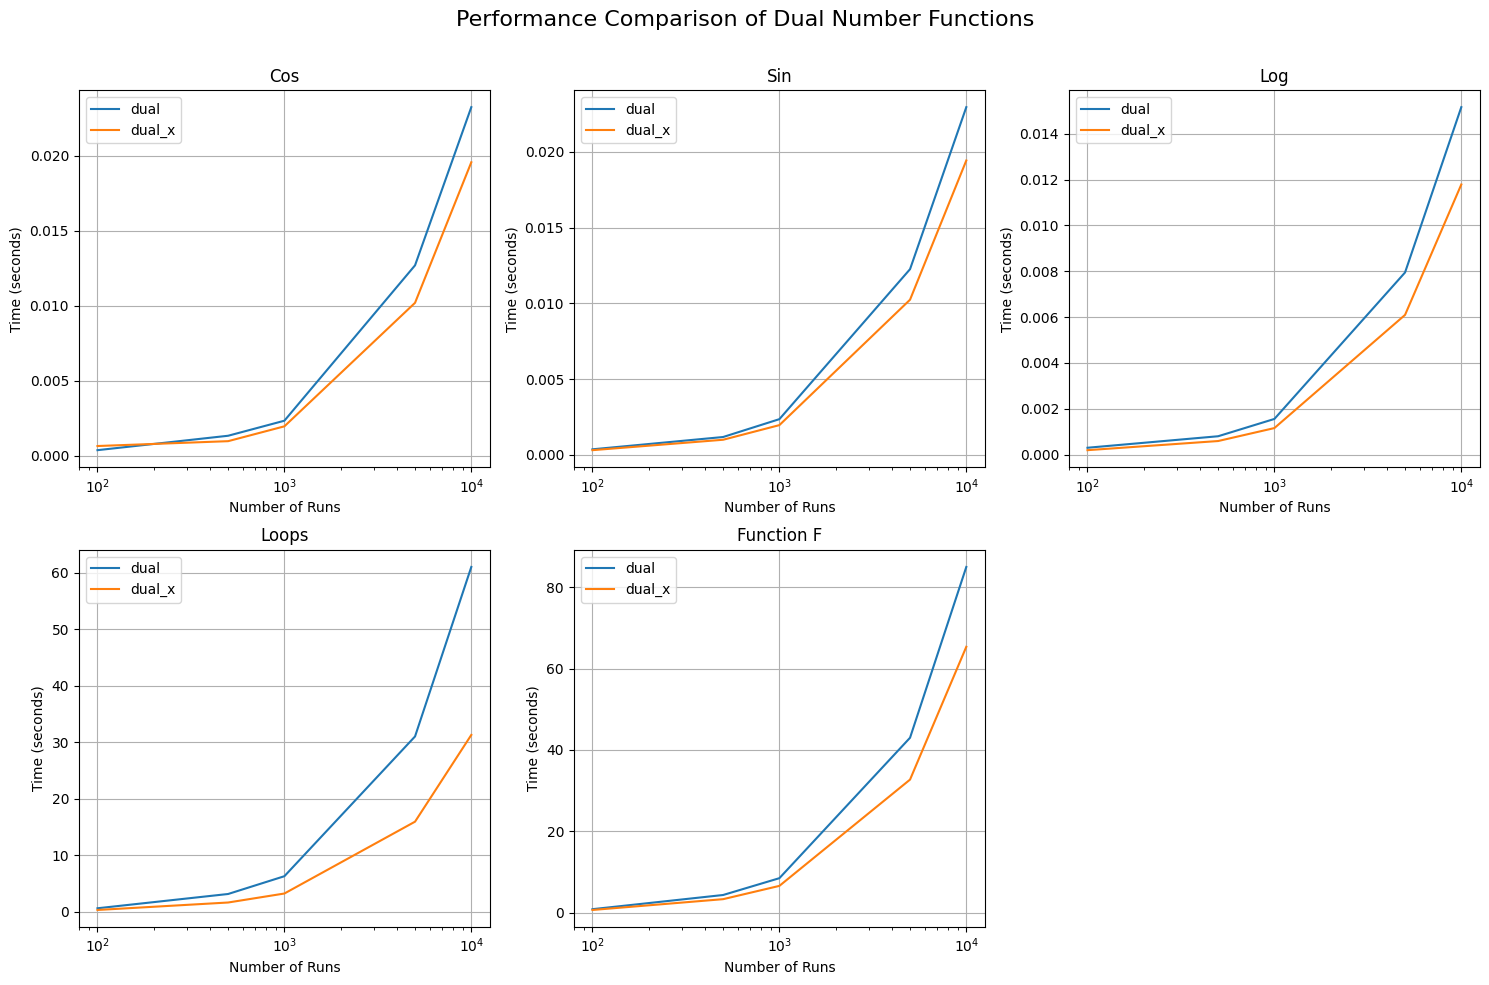

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
operations1 = list(timing_results1.keys())
titles1 = ['Cos', 'Sin', 'Log','Loops', 'Function F']

fig.suptitle('Performance Comparison of Dual Number Functions between Dual_autodiff_x and Dual_autodiff', fontsize=16)
axes = axes.flatten()
#Plot each function
for i, operation in enumerate(operations1):
    ax = axes[i]
    dual_data = timing_results1[operation]['dual']
    dual_x_data = timing_results1[operation]['dual_x']
    iterations_dual, times_dual = zip(*dual_data)
    iterations_dual_x, times_dual_x = zip(*dual_x_data)
    ax.plot(iterations_dual, times_dual, label='dual')
    ax.plot(iterations_dual_x, times_dual_x, label='dual_x')
    
    ax.set_xscale('log')
    ax.set_xlabel('Number of Runs')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(titles1[i])
    ax.legend()
    ax.grid(True)

#Removing the last non used grid
fig.delaxes(axes[-1])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()